In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:


plt.style.use('fivethirtyeight')

In [ ]:
# reading csv data
df = pd.read_csv('/content/kidney_disease.csv')

In [ ]:

df.head()


id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [ ]:
df.tail()


id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn  dm  cad appet  pe ane classification  
395  ...   47  6700  4.9   no  no   no  good  no  no         notckd  
396  ...   54  7800  6.2   no  no   no  good  no  no         notckd  
397  ...   49  6600  5.4   no  no   no  good  no  no         notckd  
398  ...   51  7200  5.9   no  no   no  good  no  no         notckd  
399  ...   53  6800  6.1   no  no   no  good  no  no         notckd  

[5 rows x 26 columns]

In [ ]:
df.info()
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

<Axes: xlabel='al', ylabel='Density'>

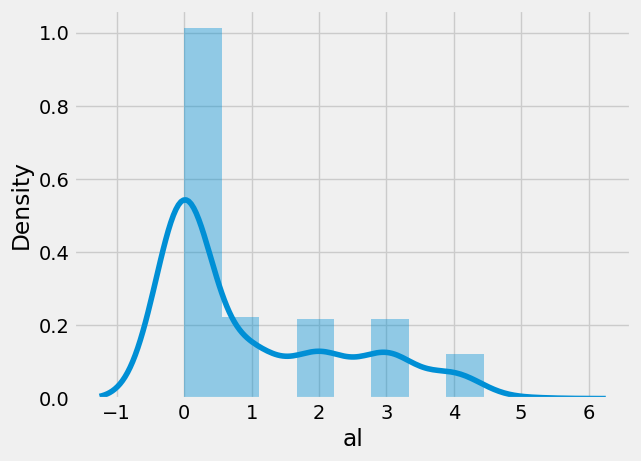

In [ ]:
#univariate analays -extacting info frome a single colum
# chacking data distribution
sns.distplot(df['al'])

In [ ]:
#create dummy data frame
df_cat = df.select_dtypes(include='float')
df_cat.head()

age    bp     sg   al   su    bgr    bu   sc    sod  pot  hemo
0  48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    NaN  NaN  15.4
1   7.0  50.0  1.020  4.0  0.0    NaN  18.0  0.8    NaN  NaN  11.3
2  62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    NaN  NaN   9.6
3  48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  11.2
4  51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    NaN  NaN  11.6

In [ ]:
for i,j in enumerate(df_cat):
  print(j)
  print(i)

age
0
bp
1
sg
2
al
3
su
4
bgr
5
bu
6
sc
7
sod
8
pot
9
hemo
10


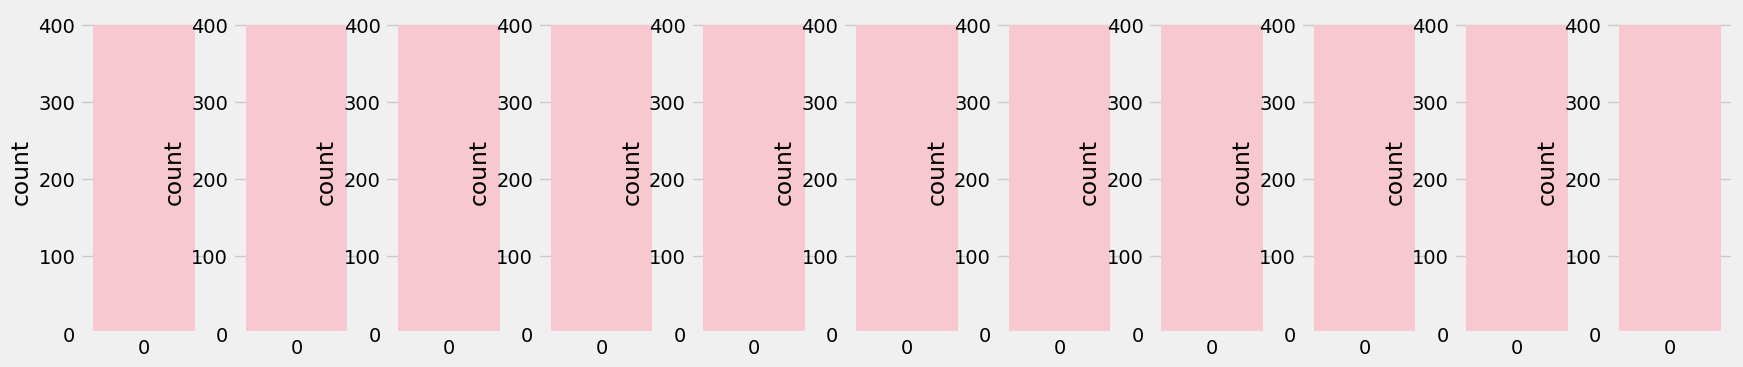

In [ ]:
#visubalizing count in each variable
plt.figure(figsize=(19,4))
for i,j in enumerate(df_cat):
  plt.subplot(1,11,i+1)
  sns.countplot(df[j],color='pink')

<Axes: xlabel='age', ylabel='count'>

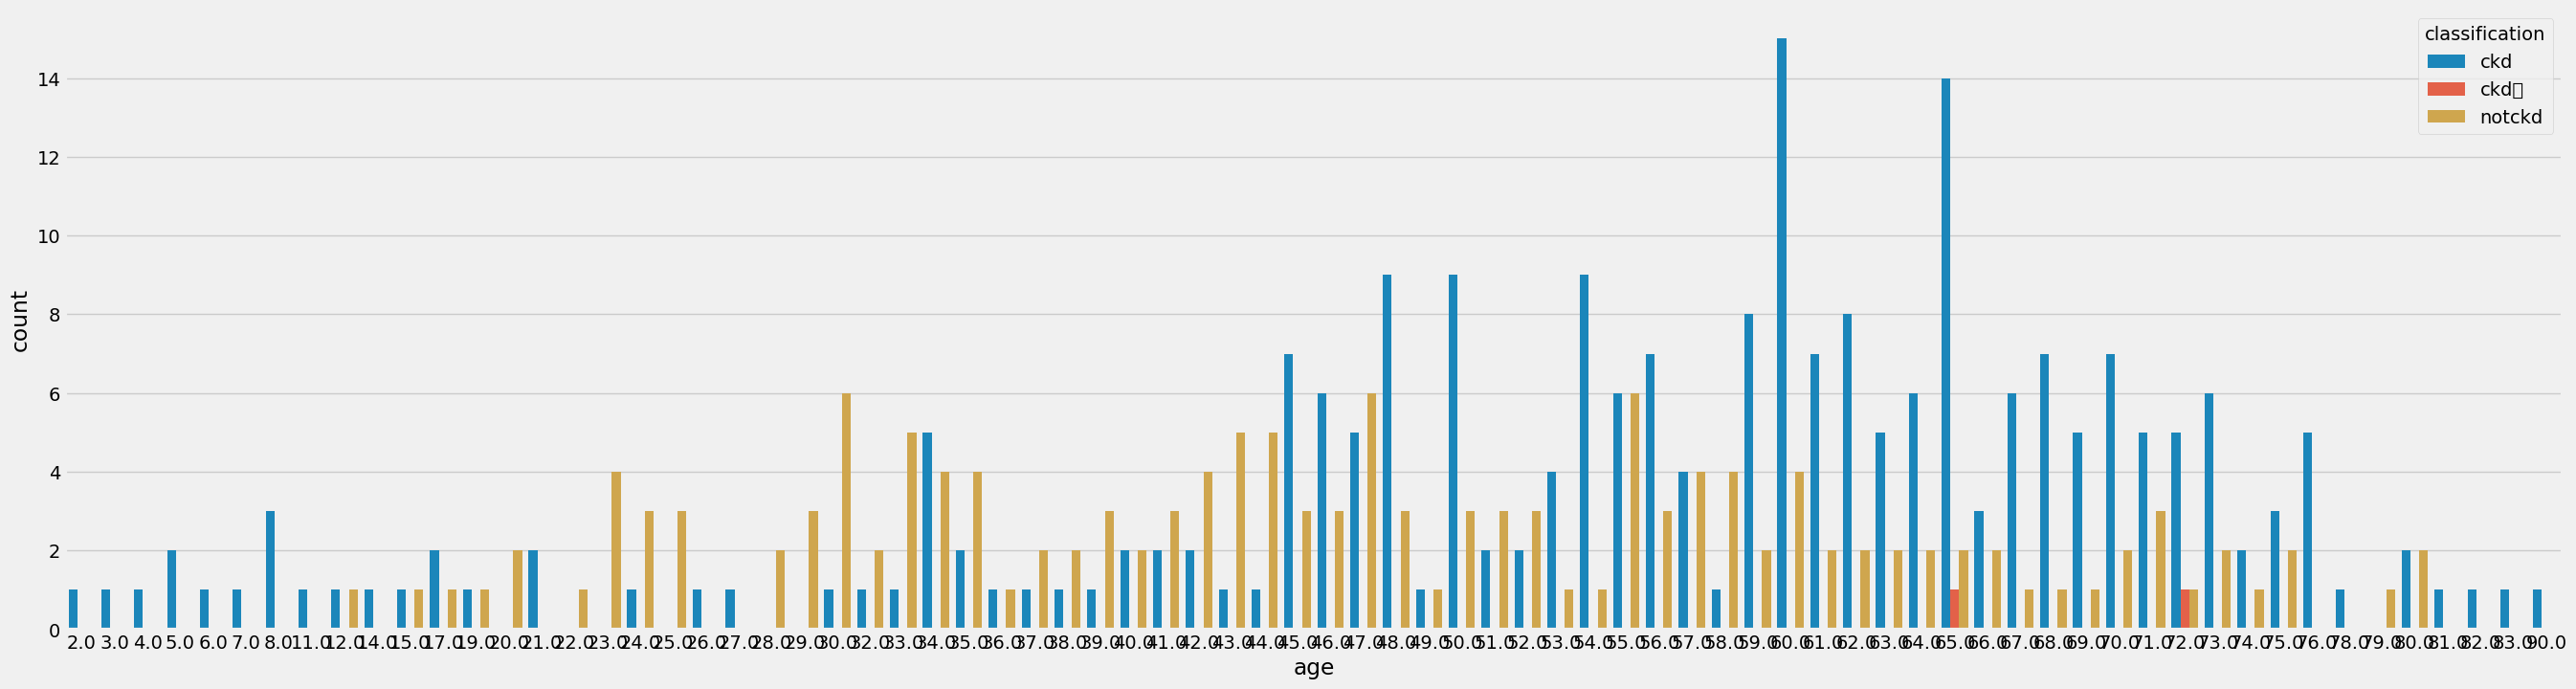

In [ ]:
plt.figure(figsize=(30,8))
plt.subplot(111)
sns.countplot(data=df,x='age',hue='classification')


<Axes: xlabel='age', ylabel='count'>

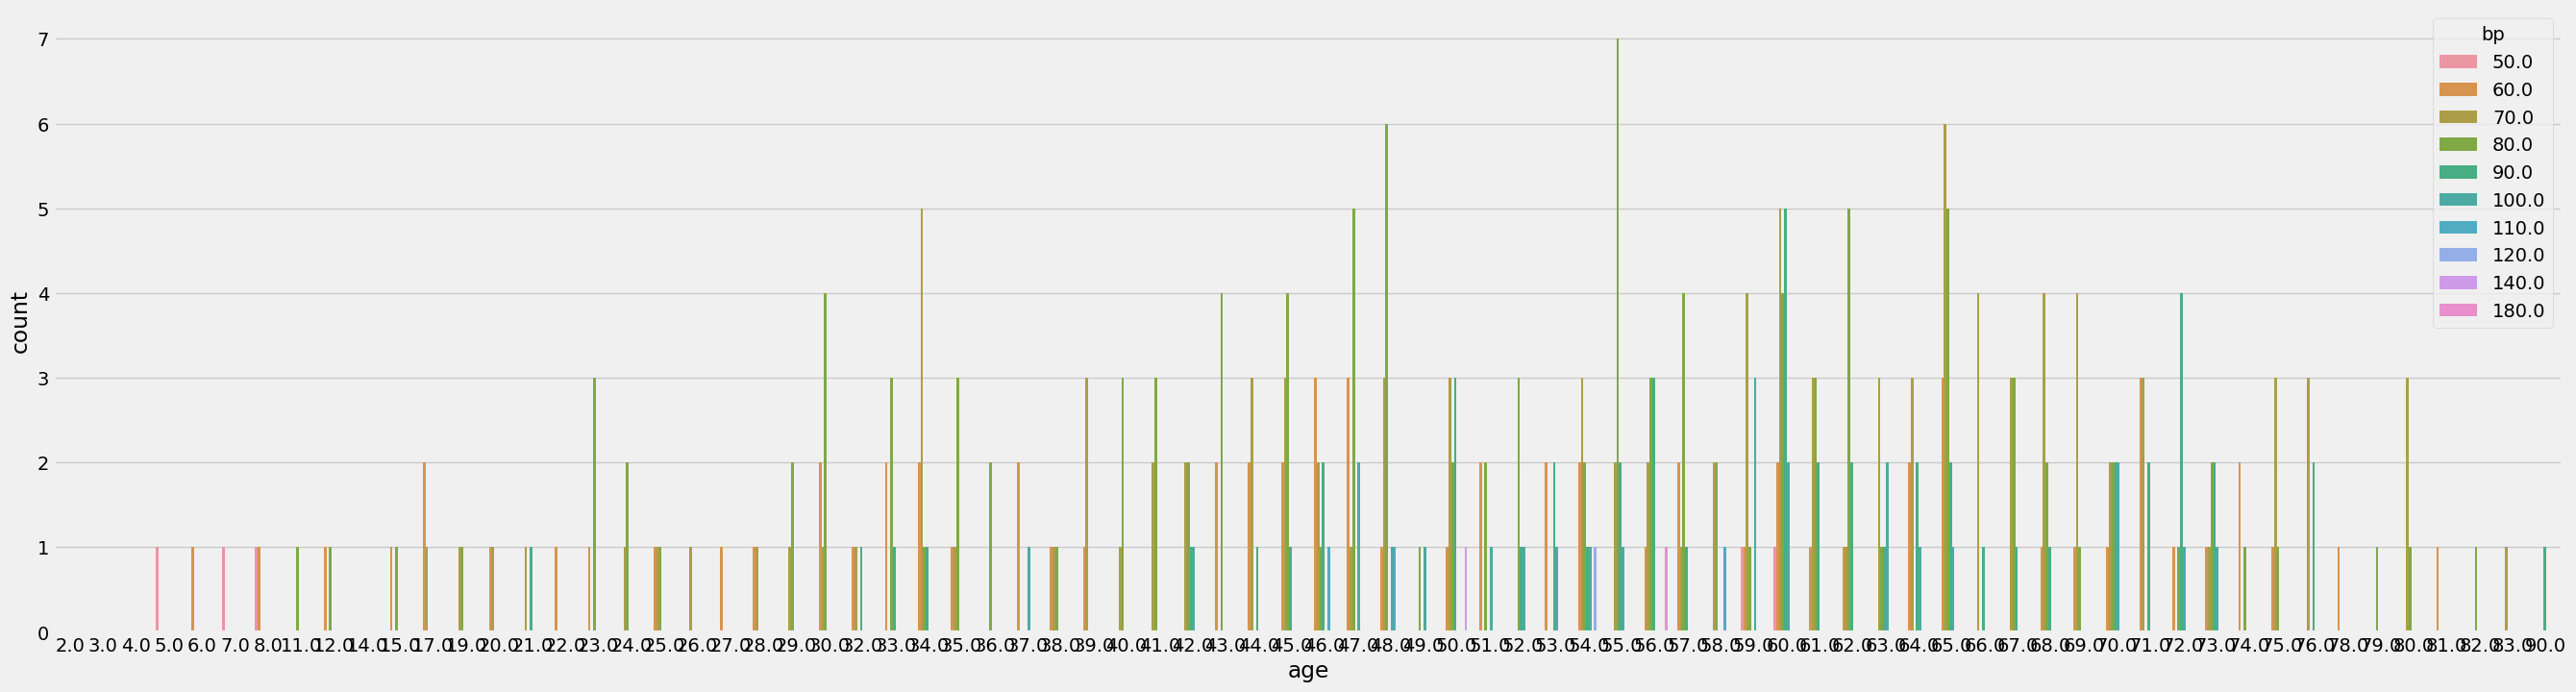

In [ ]:
plt.figure(figsize=(30,8))
plt.subplot(111)
sns.countplot(data=df,x='age',hue='bp')

<Axes: xlabel='age', ylabel='count'>

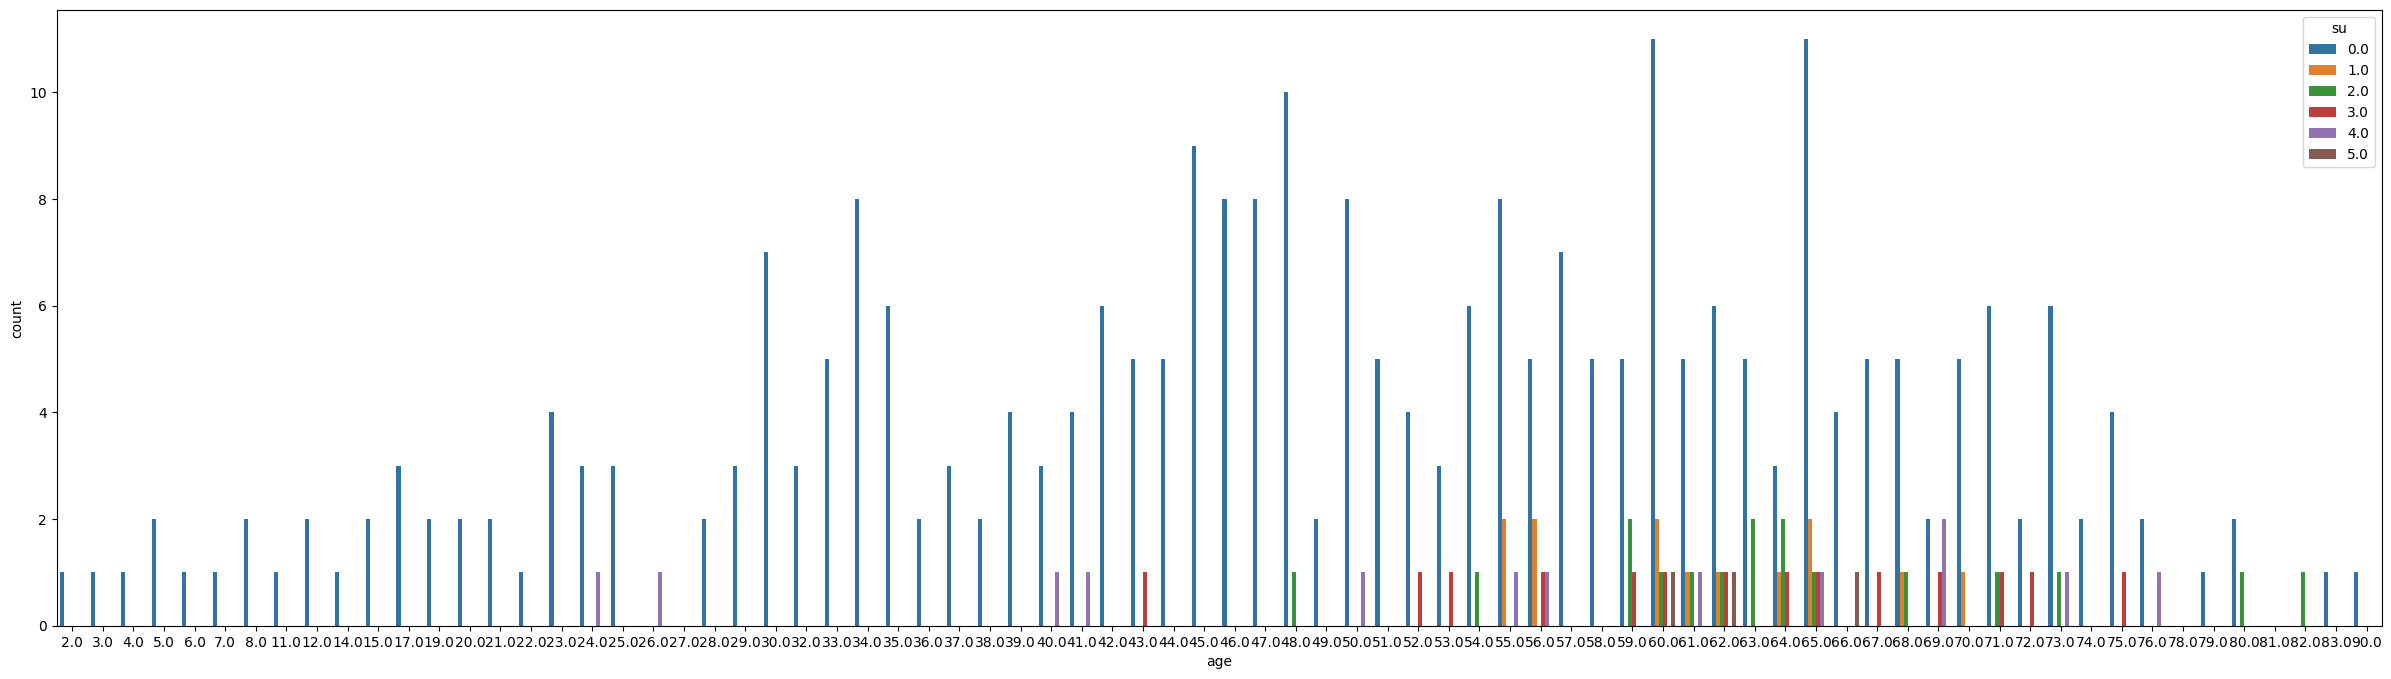

In [ ]:
plt.figure(figsize=(30,8))
plt.subplot(111)
sns.countplot(data=df,x='age',hue='su')

<Axes: xlabel='age', ylabel='count'>

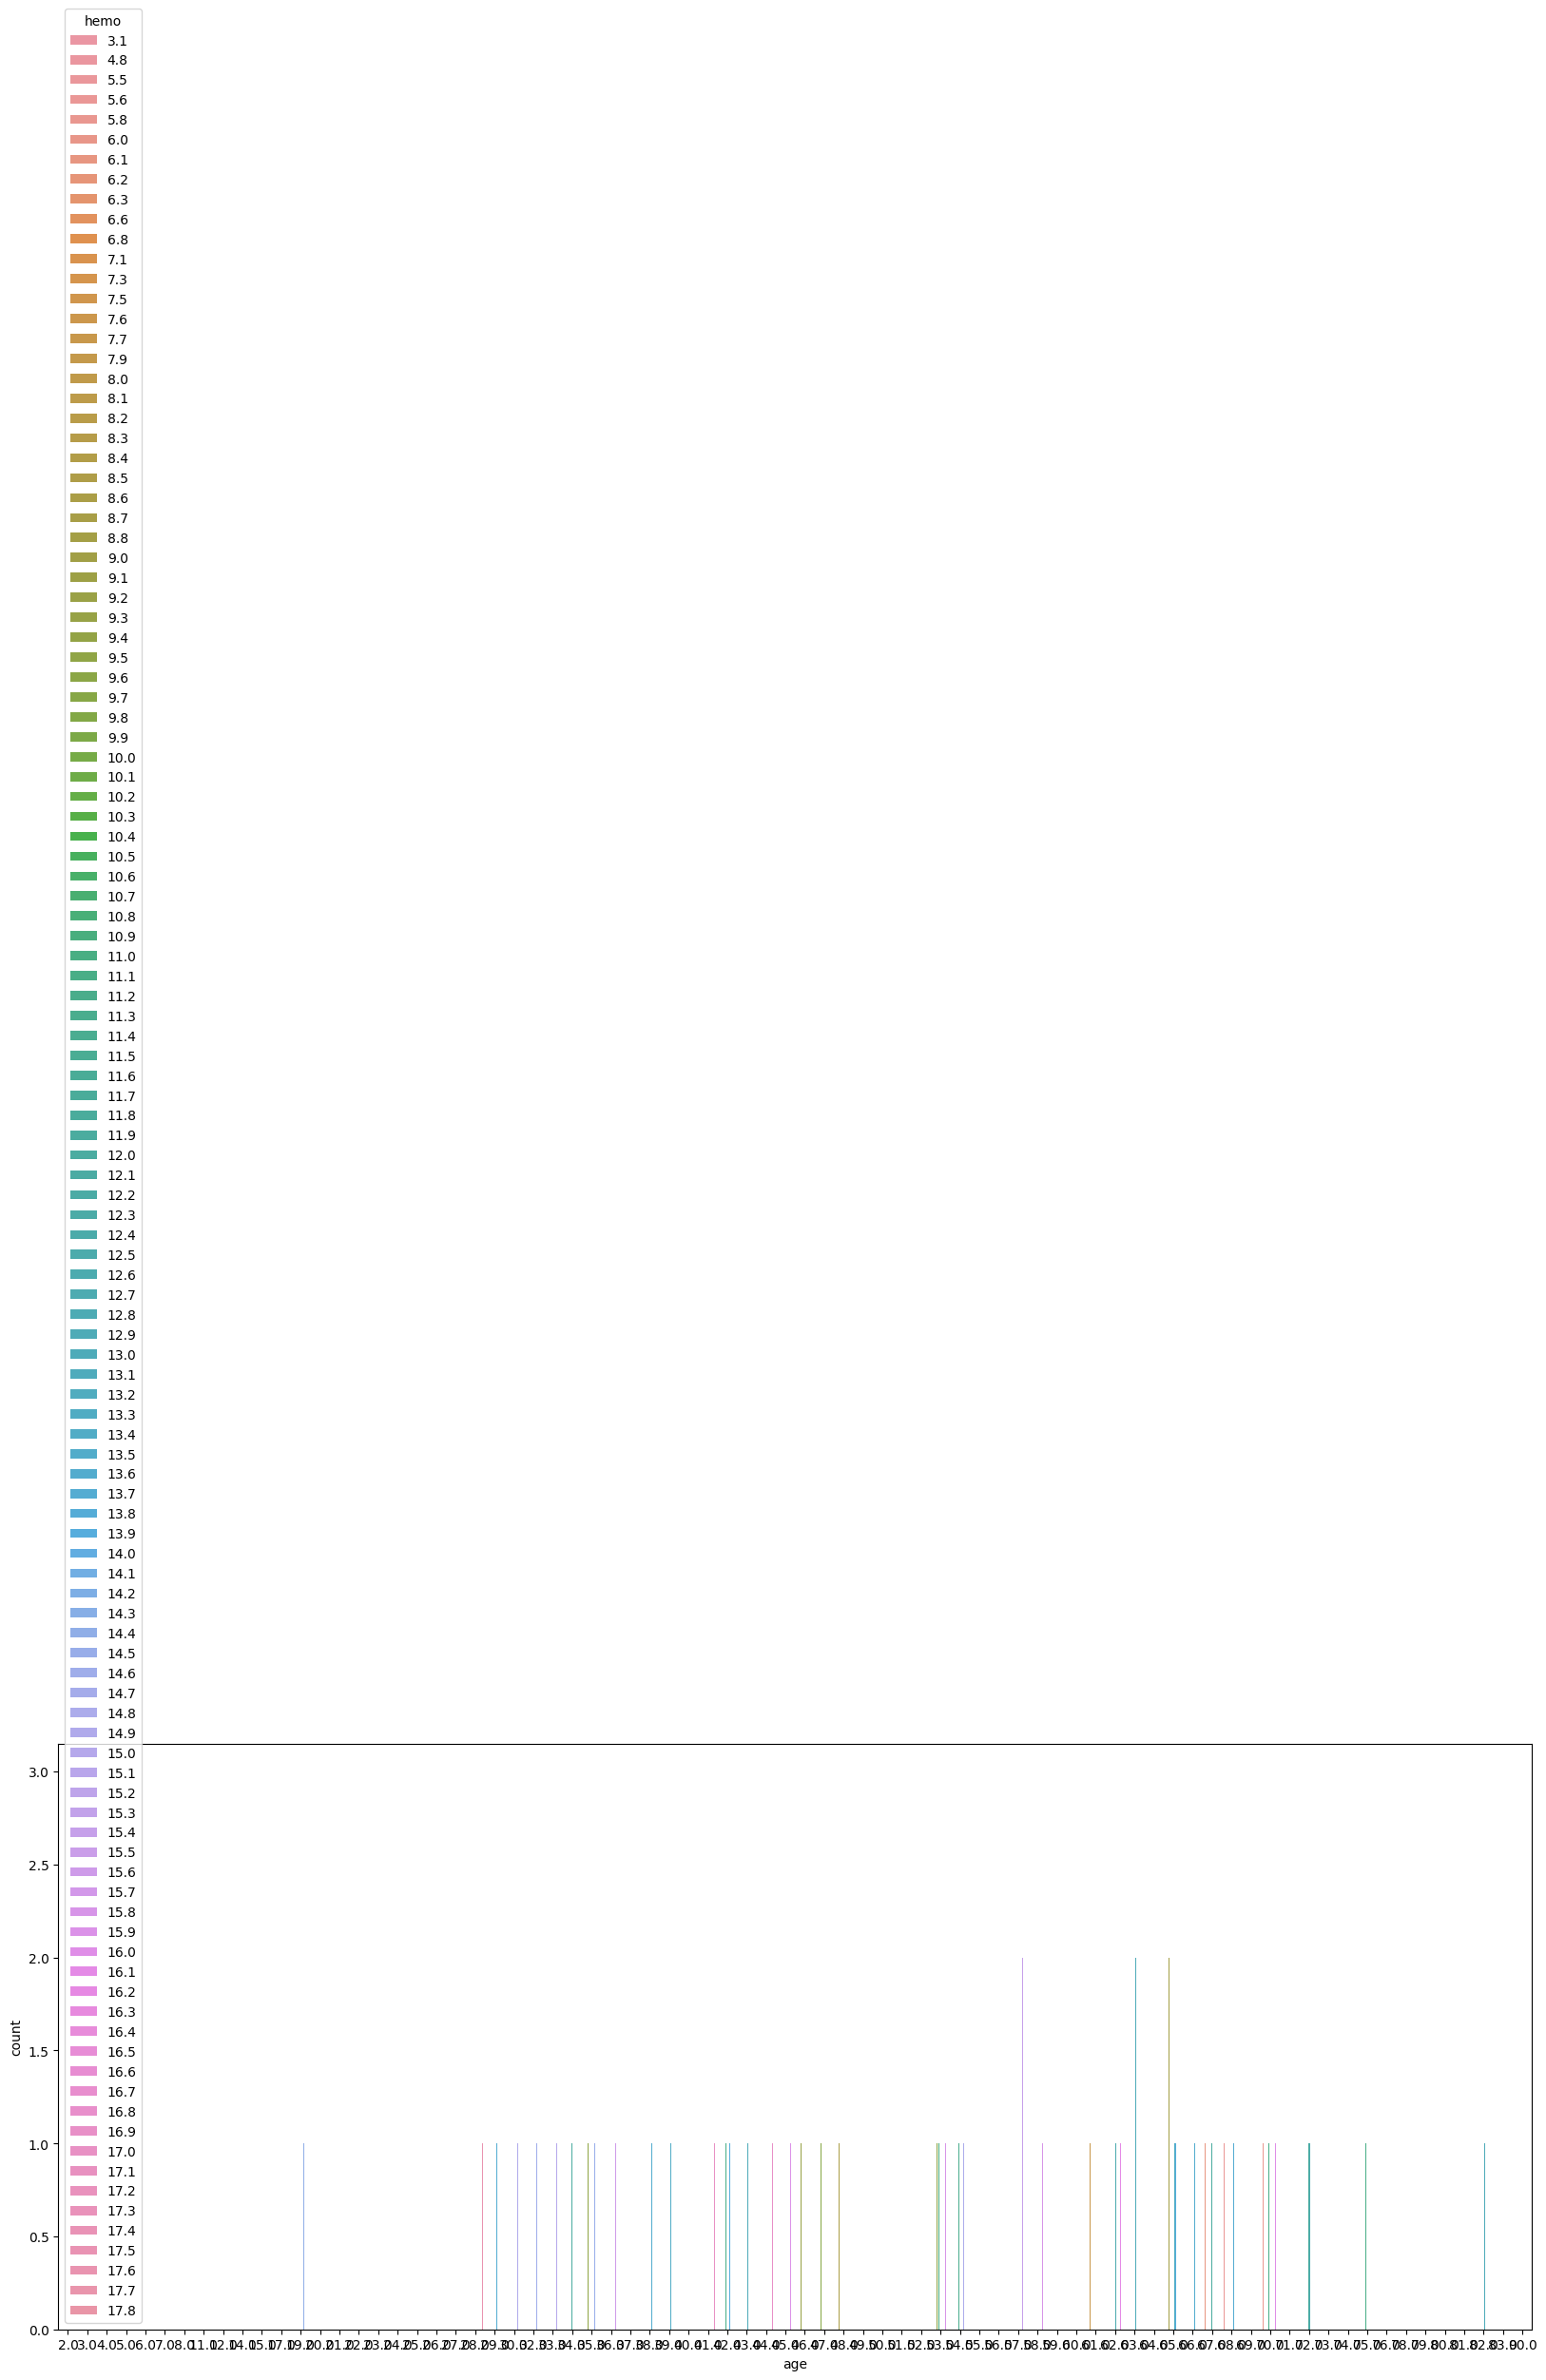

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(111)
sns.countplot(data=df,x='age',hue='hemo')

In [ ]:
df['age'].min()

2.0

In [ ]:
df['age'].max()


90.0

In [ ]:
#creat new column 
df['age_'] = ['2-30'  if  x<30 else "30-60" if x>30 and x<60 else'60+' for x in df['age']]

In [ ]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...    wc   rc  htn   dm  cad  appet   pe  ane classification   age_  
0  ...  7800  5.2  yes  yes   no   good   no   no            ckd  30-60  
1  ...  6000  NaN   no   no   no   good   no   no            ckd   2-30  
2  ...  7500  NaN   no  yes   no   poor   no  yes            ckd    60+  
3  ...  6700  3.9  yes   no   no   poor  yes  yes            ckd  30-60  
4  ...  7300  4.6   no   no   no   good   no   no            ckd  30-60  

[5 rows x 27 columns]

In [ ]:
# finding realtion between age_ & 
pd.crosstab(df['age_'],df['rbc'])

rbc    abnormal  normal
age_                   
2-30          3      28
30-60        24     109
60+          20      64

In [ ]:

# removing age_ column
df.drop('age_', axis=1,inplace=True)
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

<Axes: xlabel='al', ylabel='su'>

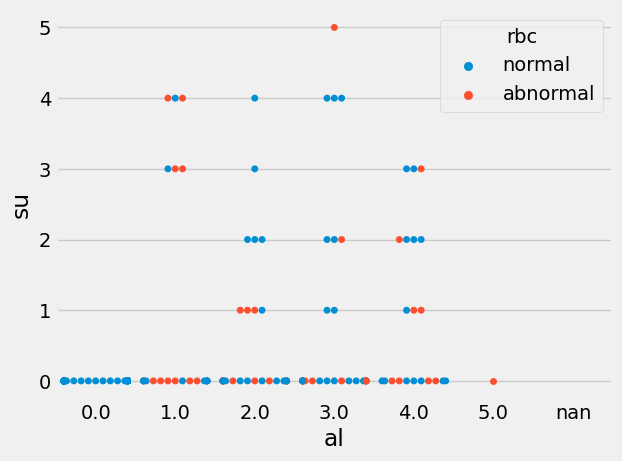

In [ ]:
 # Multivariate analysis - Exract info from  then 2 column
 sns.swarmplot(data=df,x='al',y='su',hue='rbc')

<Axes: xlabel='al', ylabel='rbc'>

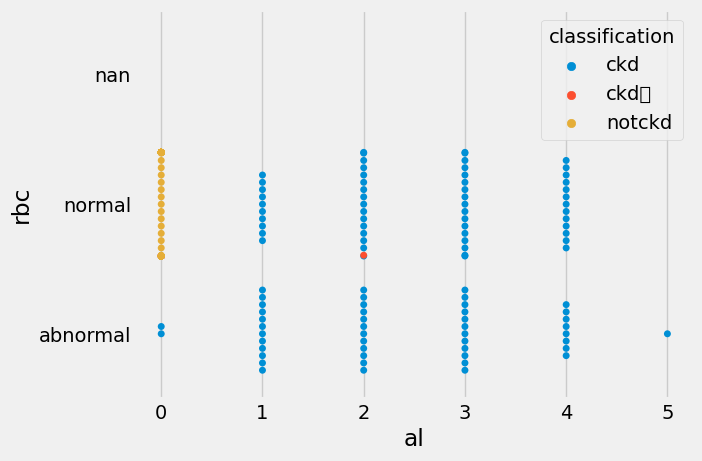

In [ ]:
sns.swarmplot(data=df,x='al',y='rbc',hue='classification')

<Axes: >

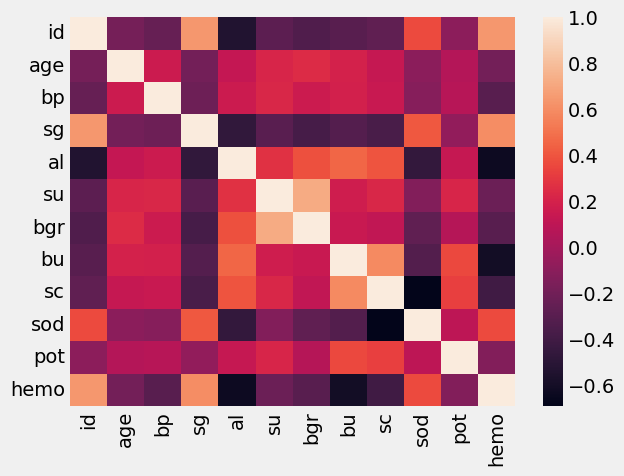

In [ ]:
#finding corr
sns.heatmap(df.corr())

In [ ]:
#descriptive analysis - descriptive stat
df.describe(include='all')

id         age          bp          sg          al  \
count   400.000000  391.000000  388.000000  353.000000  354.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    199.500000   51.483376   76.469072    1.017408    1.016949   
std     115.614301   17.169714   13.683637    0.005717    1.352679   
min       0.000000    2.000000   50.000000    1.005000    0.000000   
25%      99.750000   42.000000   70.000000    1.010000    0.000000   
50%     199.500000   55.000000   80.000000    1.020000    0.000000   
75%     299.250000   64.500000   80.000000    1.020000    2.000000   
max     399.000000   90.000000  180.000000    1.025000    5.000000   

                su     rbc      pc         pcc          ba  ...  pcv    wc  \
count   351.000000     248     335         396         396  ...  330   295   
unique         NaN       2       2           2           2  ...   44    92   
top            NaN  normal  normal  notpresent  notpresent  ...   41  9800   
freq           NaN     201     259         354         374  ...   21    11   
mean      0.450142     NaN     NaN         NaN         NaN  ...  NaN   NaN   
std       1.099191     NaN     NaN         NaN         NaN  ...  NaN   NaN   
min       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
25%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
50%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
75%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
max       5.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   

         rc  htn   dm  cad appet   pe  ane classification  
count   270  398  398  398   399  399  399            400  
unique   49    2    5    3     2    2    2              3  
top     5.2   no   no   no  good   no   no            ckd  
freq     18  251  258  362   317  323  339            248  
mean    NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
std     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
min     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
25%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
50%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
75%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
max     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  

[11 rows x 26 columns]

In [ ]:
 # Data preprocessing 

In [ ]:
# finding the shape of data
df.shape

(400, 26)

In [ ]:
#finding the null value

df.isnull()

id    age     bp     sg     al     su    rbc     pc    pcc     ba  \
0    False  False  False  False  False  False   True  False  False  False   
1    False  False  False  False  False  False   True  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
395  False  False  False  False  False  False  False  False  False  False   
396  False  False  False  False  False  False  False  False  False  False   
397  False  False  False  False  False  False  False  False  False  False   
398  False  False  False  False  False  False  False  False  False  False   
399  False  False  False  False  False  False  False  False  False  False   

     ...    pcv     wc     rc    htn     dm    cad  appet     pe    ane  \
0    ...  False  False  False  False  False  False  False  False  False   
1    ...  False  False   True  False  False  False  False  False  False   
2    ...  False  False   True  False  False  False  False  False  False   
3    ...  False  False  False  False  False  False  False  False  False   
4    ...  False  False  False  False  False  False  False  False  False   
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
395  ...  False  False  False  False  False  False  False  False  False   
396  ...  False  False  False  False  False  False  False  False  False   
397  ...  False  False  False  False  False  False  False  False  False   
398  ...  False  False  False  False  False  False  False  False  False   
399  ...  False  False  False  False  False  False  False  False  False   

     classification  
0             False  
1             False  
2             False  
3             False  
4             False  
..              ...  
395           False  
396           False  
397           False  
398           False  
399           False  

[400 rows x 26 columns]

In [ ]:
#simlify  check nul value

df.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [ ]:
#coun of null valus 
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.dropna()

id   age    bp     sg   al   su       rbc        pc         pcc  \
3      3  48.0  70.0  1.005  4.0  0.0    normal  abnormal     present   
9      9  53.0  90.0  1.020  2.0  0.0  abnormal  abnormal     present   
11    11  63.0  70.0  1.010  3.0  0.0  abnormal  abnormal     present   
14    14  68.0  80.0  1.010  3.0  2.0    normal  abnormal     present   
20    20  61.0  80.0  1.015  2.0  0.0  abnormal  abnormal  notpresent   
..   ...   ...   ...    ...  ...  ...       ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0    normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0    normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0    normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0    normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0    normal    normal  notpresent   

             ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
3    notpresent  ...   32   6700  3.9  yes   no   no  poor  yes  yes   
9    notpresent  ...   29  12100  3.7  yes  yes   no  poor   no  yes   
11   notpresent  ...   32   4500  3.8  yes  yes   no  poor  yes   no   
14      present  ...   16  11000  2.6  yes  yes  yes  poor  yes   no   
20   notpresent  ...   24   9200  3.2  yes  yes  yes  poor  yes  yes   
..          ...  ...  ...    ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47   6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54   7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49   6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51   7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53   6800  6.1   no   no   no  good   no   no   

    classification  
3              ckd  
9              ckd  
11             ckd  
14             ckd  
20             ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[158 rows x 26 columns]

In [ ]:
#finding dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

<Axes: xlabel='bp'>

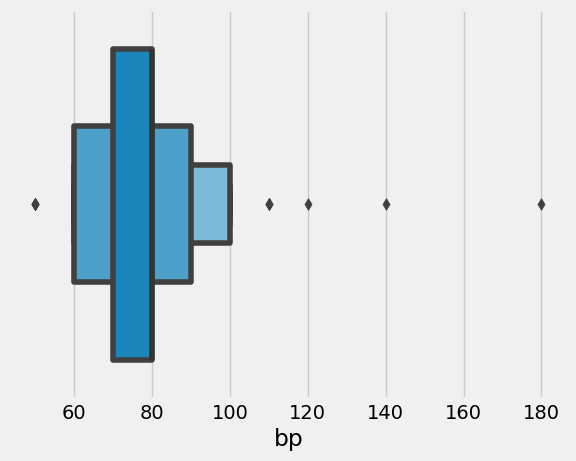

In [ ]:
#finding outliers
sns.boxenplot(x=df['bp'])

In [ ]:
#finding the count of outiers
q1 = np.quantile(df['sc'],0.25)
q3 = np.quantile(df['sc'],0.75)
print('Q1 = {}'.format(q1))
print('q3 = {}'.format(q3))
IQR = q3-q1
upperBound = q3+(1.5*IQR)
lowerBound = q1-(1.5*IQR)
print('IQR value is {}'.format(IQR))
print('the upper bound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))
print('skwed data :',len(df['hemo']>upperBound))


q1 = nan
q3 = nan
IQR value is nan
the upper bound value is nan & the lower bound value is nan
skwed data : 400


<Axes: xlabel='bp', ylabel='Density'>

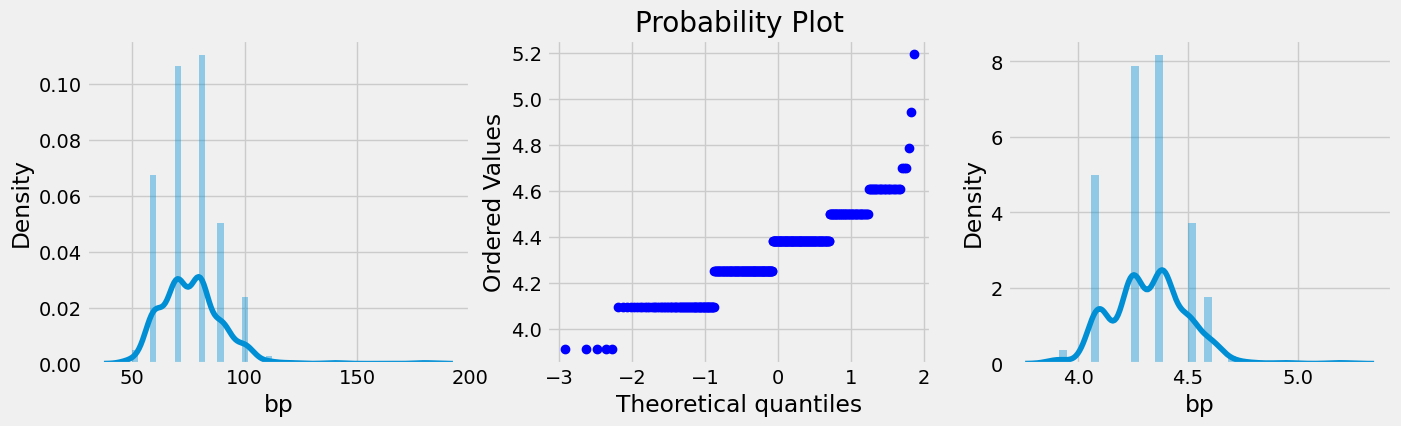

In [ ]:
#handling outliers
from scipy import stats

plt.figure(figsize=(15,4))          
plt.subplot(131)
sns.distplot(df['bp'])
plt.subplot(132)
stats.probplot(np.log(df['bp']),plot=plt)
plt.subplot(133)
sns.distplot(np.log(df['bp']))

In [ ]:

stats.probplot(np.log(df['bp']))

((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

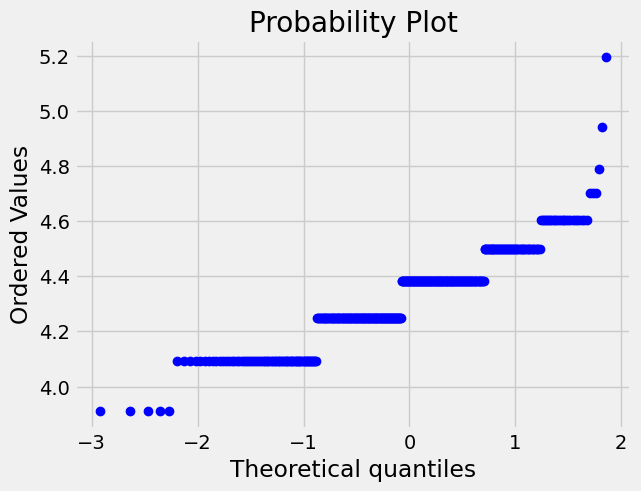

In [ ]:
stats.probplot(np.log(df['bp']),plot=plt)

In [ ]:
#trabsfiring normal value to log value
df['bp']=np.log(df['bp'])

In [ ]:
df.head()

id       age        bp     sg   al        su     rbc        pc         pcc  \
0   0  3.871201  0.390359  1.020  1.0      -inf     NaN    normal  notpresent   
1   1  1.945910  0.310462  1.020  4.0      -inf     NaN    normal  notpresent   
2   2  4.127134  0.390359  1.010  2.0  1.098612  normal    normal  notpresent   
3   3  3.871201  0.369192  1.005  4.0      -inf  normal  abnormal     present   
4   4  3.931826  0.390359  1.010  2.0      -inf  normal    normal  notpresent   

           ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2  notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3  notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4  notpresent  ...   35  7300  4.6   no   no   no  good   no   no   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  

[5 rows x 26 columns]

In [ ]:
#Encoding 

#encoding with list copm
df['pc'] = [0 if x=='normal' else 1 if x=='abnormal' else 2 for x in df['pc']]


In [ ]:
df.head()

id       age        bp     sg   al        su     rbc  pc         pcc  \
0   0  3.871201  0.390359  1.020  1.0      -inf     NaN   0  notpresent   
1   1  1.945910  0.310462  1.020  4.0      -inf     NaN   0  notpresent   
2   2  4.127134  0.390359  1.010  2.0  1.098612  normal   0  notpresent   
3   3  3.871201  0.369192  1.005  4.0      -inf  normal   1     present   
4   4  3.931826  0.390359  1.010  2.0      -inf  normal   0  notpresent   

           ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2  notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3  notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4  notpresent  ...   35  7300  4.6   no   no   no  good   no   no   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  

[5 rows x 26 columns]

In [ ]:
#encoding with replace method

df['rbc'] = df['rbc'].replace({'normal' :1,'abnormal' :2})

In [ ]:
df.head()



id   age    bp     sg   al   su  rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0  NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0  NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  0.0    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  0.0    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [ ]:
df['pc'] = df['pc'].replace({'normal' :0,'abnormal' :3})

In [ ]:
df.head()

id   age    bp     sg   al   su  rbc   pc         pcc          ba  ...  \
0   0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  notpresent  notpresent  ...   
1   1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  notpresent  notpresent  ...   
2   2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  notpresent  notpresent  ...   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  3.0     present  notpresent  ...   
4   4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  notpresent  notpresent  ...   

   pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1   38  6000  NaN   no   no   no  good   no   no            ckd  
2   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [ ]:
df['pcc'] = df['pcc'].replace({'present' :1,'notpresent' :2})

In [ ]:
df.head()

id   age    bp     sg   al   su  rbc   pc  pcc          ba  ...  pcv    wc  \
0   0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  2.0  notpresent  ...   44  7800   
1   1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  2.0  notpresent  ...   38  6000   
2   2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  2.0  notpresent  ...   31  7500   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  3.0  1.0  notpresent  ...   32  6700   
4   4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  2.0  notpresent  ...   35  7300   

    rc  htn   dm  cad appet   pe  ane classification  
0  5.2  yes  yes   no  good   no   no            ckd  
1  NaN   no   no   no  good   no   no            ckd  
2  NaN   no  yes   no  poor   no  yes            ckd  
3  3.9  yes   no   no  poor  yes  yes            ckd  
4  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [ ]:
df['ba'] = df['ba'].replace({'present' :1,'notpresent' :2})

In [ ]:
df.head()

id   age    bp     sg   al   su  rbc   pc  pcc   ba  ...  pcv    wc   rc  \
0   0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  2.0  2.0  ...   44  7800  5.2   
1   1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  2.0  2.0  ...   38  6000  NaN   
2   2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  2.0  2.0  ...   31  7500  NaN   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  3.0  1.0  2.0  ...   32  6700  3.9   
4   4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  2.0  2.0  ...   35  7300  4.6   

   htn   dm  cad appet   pe  ane classification  
0  yes  yes   no  good   no   no            ckd  
1   no   no   no  good   no   no            ckd  
2   no  yes   no  poor   no  yes            ckd  
3  yes   no   no  poor  yes  yes            ckd  
4   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [ ]:
df['htn'] = df['htn'].replace({'yes' :1,'no' :2})

In [ ]:
df.head()

id   age    bp     sg   al   su  rbc   pc  pcc   ba  ...  pcv    wc   rc  \
0   0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  2.0  2.0  ...   44  7800  5.2   
1   1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  2.0  2.0  ...   38  6000  NaN   
2   2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  2.0  2.0  ...   31  7500  NaN   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  3.0  1.0  2.0  ...   32  6700  3.9   
4   4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  2.0  2.0  ...   35  7300  4.6   

   htn   dm  cad appet   pe  ane  classification  
0  1.0  yes   no  good   no   no             ckd  
1  2.0   no   no  good   no   no             ckd  
2  2.0  yes   no  poor   no  yes             ckd  
3  1.0   no   no  poor  yes  yes             ckd  
4  2.0   no   no  good   no   no             ckd  

[5 rows x 26 columns]

In [ ]:
df['dm'] = df['dm'].replace({'yes' :1,'no' :2})

In [ ]:
df['appet'] = df['appet'].replace({'good' :0, 'poor'  :1})

In [ ]:
df['pe'] = df['pe'].replace({'yes' :1,'no' :2})

In [ ]:
df['ane'] = df['ane'].replace({'yes' :1,'no' :3})

In [ ]:
df.head()

id   age    bp     sg   al   su  rbc   pc  pcc   ba  ...  pcv    wc   rc  \
0   0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  2.0  2.0  ...   44  7800  5.2   
1   1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  2.0  2.0  ...   38  6000  NaN   
2   2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  2.0  2.0  ...   31  7500  NaN   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  3.0  1.0  2.0  ...   32  6700  3.9   
4   4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  2.0  2.0  ...   35  7300  4.6   

   htn  dm  cad appet   pe  ane  classification  
0  1.0   1    2   0.0  2.0  3.0             ckd  
1  2.0   2    2   0.0  2.0  3.0             ckd  
2  2.0   1    2   1.0  2.0  1.0             ckd  
3  1.0   2    2   1.0  1.0  1.0             ckd  
4  2.0   2    2   0.0  2.0  3.0             ckd  

[5 rows x 26 columns]

In [ ]:
x = df.drop('classification',axis=1)
x.head()

id   age    bp     sg   al   su  rbc   pc  pcc   ba  ...  hemo  pcv    wc  \
0   0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  2.0  2.0  ...  15.4   44  7800   
1   1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  2.0  2.0  ...  11.3   38  6000   
2   2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  2.0  2.0  ...   9.6   31  7500   
3   3  48.0  70.0  1.005  4.0  0.0  0.0  3.0  1.0  2.0  ...  11.2   32  6700   
4   4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  2.0  2.0  ...  11.6   35  7300   

    rc  htn  dm cad appet   pe  ane  
0  5.2  1.0   1   2   0.0  2.0  3.0  
1  NaN  2.0   2   2   0.0  2.0  3.0  
2  NaN  2.0   1   2   1.0  2.0  1.0  
3  3.9  1.0   2   2   1.0  1.0  1.0  
4  4.6  2.0   2   2   0.0  2.0  3.0  

[5 rows x 25 columns]

In [ ]:
y = df['classification']
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [ ]:
#spiliting